Coefficients: [1.33333333 0.66666667]
R-squared: 0.9230769230769227


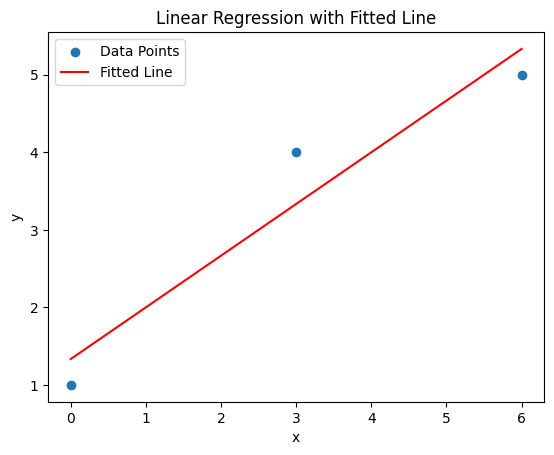

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function for linear regression
def linear_regression(x, y):
    # Add a column of ones to the predictor matrix X
    X = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1)))

    # Compute the transpose of X
    X_T = np.transpose(X)

    # Compute X^T * X
    X_T_X = np.dot(X_T, X)

    # Compute the inverse of X^T * X
    X_T_X_inv = np.linalg.inv(X_T_X)

    # Compute X^T * y
    X_T_y = np.dot(X_T, y)

    # Compute the coefficients beta
    beta = np.dot(X_T_X_inv, X_T_y)

    # Compute the fitted values
    y_fit = np.dot(X, beta)

    return beta, y_fit

# Example data
x_data = np.array([0, 3, 6])
y_data = np.array([1, 4, 5])

# Perform linear regression
coefficients, y_fit = linear_regression(x_data, y_data)

# Calculate R-squared value
correlation_matrix = np.corrcoef(y_data, y_fit)
r_squared = correlation_matrix[0, 1] ** 2

# Print coefficients and R-squared value
print("Coefficients:", coefficients)
print("R-squared:", r_squared)

# Plot the scatterplot and the fitted line
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_data, y_fit, label='Fitted Line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Fitted Line')
plt.show()


Coefficients: [ 1.          1.33333333 -0.11111111]
R-squared: 0.9999999999999996


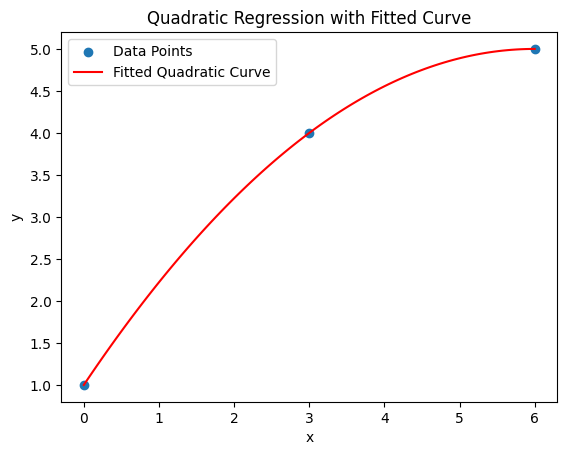

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function for quadratic regression
def quadratic_regression(x, y):
    # Add a column of ones, x, and x^2 to the predictor matrix X
    X = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1), (x**2).reshape(-1, 1)))

    # Compute the transpose of X
    X_T = np.transpose(X)

    # Compute X^T * X
    X_T_X = np.dot(X_T, X)

    # Compute the inverse of X^T * X
    X_T_X_inv = np.linalg.inv(X_T_X)

    # Compute X^T * y
    X_T_y = np.dot(X_T, y)

    # Compute the coefficients beta
    beta = np.dot(X_T_X_inv, X_T_y)

    # Compute the fitted values
    y_fit = np.dot(X, beta)

    return beta, y_fit

# Example data
x_data = np.array([0, 3, 6])
y_data = np.array([1, 4, 5])

# Perform quadratic regression
coefficients, y_fit = quadratic_regression(x_data, y_data)

# Calculate R-squared value
correlation_matrix = np.corrcoef(y_data, y_fit)
r_squared = correlation_matrix[0, 1] ** 2

# Print coefficients and R-squared value
print("Coefficients:", coefficients)
print("R-squared:", r_squared)

# Plot the scatterplot and the fitted quadratic curve
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_fit = coefficients[0] + coefficients[1] * x_range + coefficients[2] * (x_range ** 2)

plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_range, y_range_fit, label='Fitted Quadratic Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Quadratic Regression with Fitted Curve')
plt.show()
